# K-Nearest Neighbour (KNN)
The K-Nearest Neighbors (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.<br>
During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance, Manhattan distance, etc according to the dataset.<br>
Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of classification, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point. For regression, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point.<br>
The KNN algorithm is straightforward and easy to understand, making it a popular choice in various domains. However, its performance can be affected by the choice of K and the distance metric, so careful parameter tuning is necessary for optimal results.<br>

## When to use KNN?
KNN Algorithm can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique, we generally look at 3 important aspects:<br>
1. Ease of interpreting output
2. Calculation time
3. Predictive power

## How does the KNN Algo Works?
Given below is a spread of **red circles (RC)** and **green squares (GS)**:<br>
<img src="Images/KNN1.png" width="300" height="100"><br>
We intend to find out the class of the **blue star (BS)**. BS can either be RC or GS and nothing else. The **"K"** in KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say **K = 3**. Hence, we will now make a circle with BS as the center just as big as to enclose only three data points on the plane. Refer to the following diagram for more details:<br>
<img src="Images/KNN2.png" width="200" height="50"><br>
The three closest points to BS are all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm.<br>

## How to Choose the Factor K?
First, let us try to understand the influence of the K-nearest neighbors (KNN) in the algorithm. If we consider the last example, keeping all 6 training observations constant, a given K value allows us to establish **boundaries** for each class. These decision boundaries effectively segregate, for instance, RC from GS. Similarly, let’s examine the impact of the value "K" on these class boundaries. The following illustrates the distinct boundaries that separate the two classes, each corresponding to different values of K.<br>
<img src="Images/KNN3.png" width="400" height="150"><br>
We can see that the boundary becomes **smoother** with **increasing** value of K. With K increasing to **infinity** it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access different K-value. Following is the curve for the training error rate with a varying value of K:<br>
<img src="Images/KNN4.png" width="400" height="150"><br>
As we can see, the error rate at **K=1** is always **zero** for the training sample. This is because the **closest point** to any training data point is **itself**.Hence the prediction is always accurate with K=1. If validation error curve would have been similar, our choice of K would have been 1. Following is the validation error curve with varying value of K:<br>
<img src="Images/KNN5.png" width="400" height="150"><br>
At K=1, we were **overfitting** the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, we can segregate the training and validation from the initial dataset. Now plot the validation error curve to get the optimal value of K. This value of K should be used for all predictions.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from collections import Counter

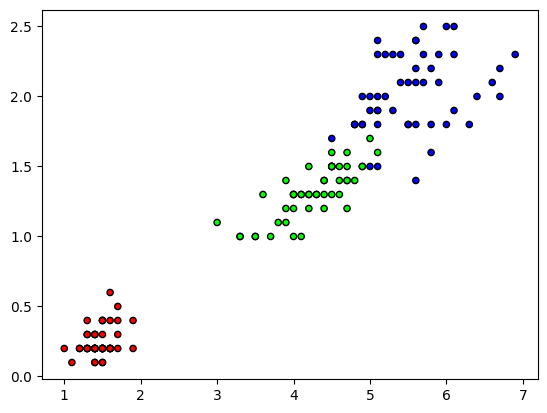

In [2]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

We are loading the iris dataset using sklearn library **`datasets.load_iris()`** this dataset contains features of iris flowers and their corresponding labels.<br>
Then we are splitting the dataset into train and test set using **`train_test_split()`** function from sklearn library.<br>
To view the data we will create a scatter plot of train set using **`plt.scatter()`**, the **cmap** parameter specifies the colours to use for points. The **edgecolor='k'** parameter sets the colour of the point edges to black and **s=20** specifies the size of the points.

In [3]:
def euclidean_distance(x1,x2):
    distances = np.sqrt(np.sum((x1-x2)**2))
    return distances

**`euclidean_distance()`** function calculates the Euclidean distance between two vectors **x1** and **x2**. The Euclidean distance is a measure of the straight-line distance between two points in Euclidean space.

# KNN for Classification

In [4]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

The above class implements the KNN algorithm:<br>
The **`__init__()`** is a constructor method that initializes the KNN object with a parameter k, which specifies the number of nearest neighbors to consider when making predictions. By default, k is set to 3.<br>
The **`fit()`** method is used to train the KNN model. It takes two parameters **X** and **y**, where X is the training data (a 2D array-like structure where each row represents a sample and each column represents a feature) and y is the corresponding target labels for each sample in X. The method stores X and y in the **self.X_train** and **self.y_train** attributes, respectively.<br>
The **`predict()`** method is used to make predictions on new data. It takes a 2D array-like structure X as input, where each row represents a new sample for which predictions need to be made. It iterates over each sample in X and calls the **_predict** method to make individual predictions for each sample. It returns a **list of predictions** for all the samples in X.<br>
The **`_predict()`** is a **private** method that is used to make a prediction for a single sample x. It computes the **Euclidean distance** between x and each sample in the training data **self.X_train** to find the k nearest neighbors. It then performs a majority vote among the labels of the k nearest neighbors to determine the predicted label for x.

In [5]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

print(preds)

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]


**`clf = KNN(k=5)`** creates an instance of the KNN class with k=5, which means the model will consider the 5 nearest neighbors for classification.<br>
**`clf.fit(X_train, y_train)`** fits the KNN model to the training data X_train and corresponding labels y_train. It stores this training data internally within the KNN object.<br>
**`preds = clf.predict(X_test)`** makes predictions on the test data X_test using the trained KNN model. It calls the predict method of the KNN object, which returns a list of predicted labels for each sample in X_test.<br>

In [6]:
acc = np.sum(preds == y_test)/len(y_test)
print(acc)

0.9666666666666667


**`acc = np.sum(preds == y_test)/len(y_test)`** calculates the accuracy of the predictions by comparing each element of the **preds** array (predicted labels) with the corresponding element in the **y_test** array (actual labels). The expression **preds == y_test** creates a **boolean** array where True indicates a correct prediction and False indicates an incorrect prediction. **np.sum(preds == y_test)** counts the number of correct predictions, and dividing it by the number of the test samples gives the accuracy. So here accuracy is the ratio of correct predictions to the total number of predictions.

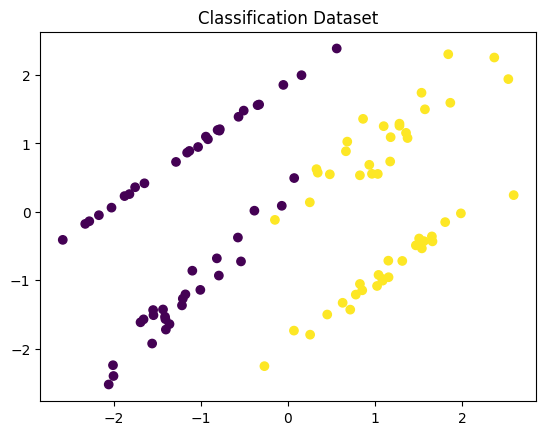

In [7]:
from sklearn.datasets import make_classification, make_regression

# Generate a classification dataset
X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_clf, y_clf, test_size = 0.2, random_state = 1234)
plt.figure()
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap='viridis')
plt.title("Classification Dataset")
plt.show()

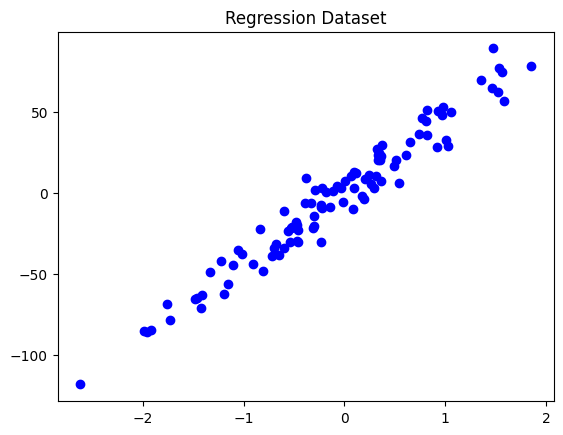

In [8]:
# Generate a regression dataset
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_reg, y_reg, test_size = 0.2, random_state = 1234)
plt.figure()
plt.scatter(X_reg, y_reg, color='b')
plt.title("Regression Dataset")
plt.show()

Here we have created dataset for both **Regression** and **Classification** tasks and we will perform both this tasks using KNN.

# KNN for Classification and Regression

In [9]:
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X, task='classification'):
        if task == 'classification':
            return self._predict_classification(X)
        elif task == 'regression':
            return self._predict_regression(X)
        else:
            raise ValueError("Invalid task. Supported tasks are 'classification' and 'regression'.")

    def _predict_classification(self, X):
        predictions = [self._predict_single_classification(x) for x in X]
        return np.array(predictions)
    
    def _predict_single_classification(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _predict_regression(self, X):
        predictions = [self._predict_single_regression(x) for x in X]
        return np.array(predictions)

    def _predict_single_regression(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_labels)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In this class the **`_predict_regression()`** function uses the **`_predict_single_regression()`** method to find the distance between the given point with its k-nearest neighbours and take the mean of all the distances. Similarly the **`_predict_classification()`** function uses the **`_predict_single_classification()`** method to find the distance between the given point with its k-nearest neighbours find the closest point and assign the label of this point to the given point. 

In [10]:
# Classification example
clf = KNN(k=3)
clf.fit(X_train, y_train)
y_pred_classification = clf.predict(X_test, task='classification')
y_pred_classification

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [11]:
# Regression example
reg = KNN(k=3)
reg.fit(X_train, y_train)
y_pred_regression = reg.predict(X_test, task='regression')
y_pred_regression

array([1.        , 1.33333333, 2.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 2.        ,
       1.        , 0.        , 2.        , 1.        , 0.        ,
       1.        , 2.        , 0.        , 2.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 2.        ,
       0.        , 2.        , 1.        , 2.        , 0.        ])

# Using Sklearn Model

In [12]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [13]:
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3364.3932584269664
